In [1]:
import torch
from transform_utilities import *
from visualization_utilities import *
from gtzan_dataset import *
from models import *
from mtg_contrastive import MTGContrastiveDataset
from mtg_contrastive_mel import MTG_Mel_ContrastiveDataset, worker_init_fn
from infonce_loss import InfoNCE
from pathlib import Path



In [2]:

def visualize_mel_spectrogram(mel_spectrogram, width=10, show_axes=True):
    fig = plt.figure(figsize=(width, 4))
    ax = fig.add_subplot(111)
    ax.imshow(mel_spectrogram[0], aspect='auto', origin='lower', cmap='viridis')

    if not show_axes:
        ax.set_axis_off()

    plt.show()
    plt.close()


Using device: cuda
['1100512.low.mp3', '242314.low.mp3', '1250219.low.mp3', '1082915.low.mp3', '204211.low.mp3', '1391302.low.mp3', '26219.low.mp3', '25809.low.mp3']
torch.Size([8, 1, 64, 431])


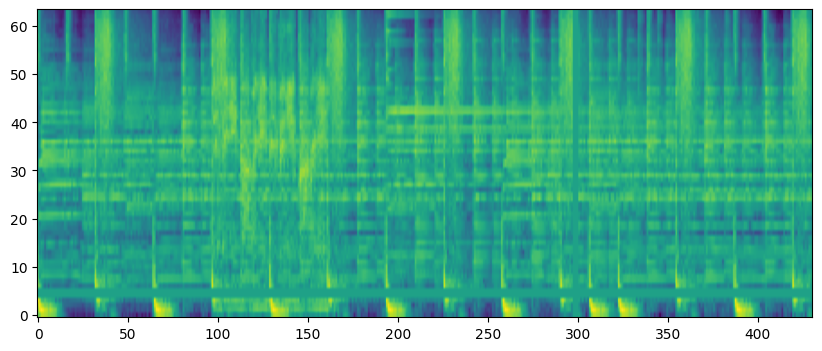

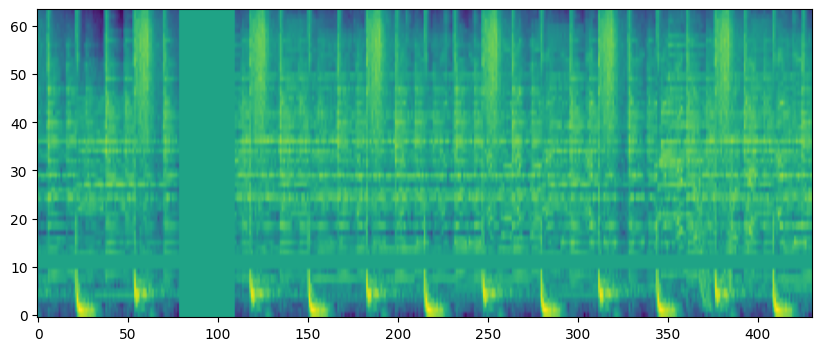

In [3]:
np.random.seed(0)

if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
print(f"Using device: {device}")

batch_size = 8

# Using the MTG Dataset
train_folders = [
    "00", "01", "02", "03",
    "04", "05", "06", "07",
    "08", "09", "10", "11",
    "12", "13", "14", "15",
    "16", "17", "18", "19"
]
val_folders = [
    "20"
]

mtg_path = Path("/home/gurpreet/workspace/aps360-audio/mtg")

references_sample_rate = 22050

mtg_train_dataset = MTGContrastiveDataset(mtg_path, references_sample_rate, mask_prob=0.8, samples_per_file=15, folder_whitelist=train_folders, concurrent_files=batch_size)
mtg_val_dataset = MTGContrastiveDataset(mtg_path, references_sample_rate, mask_prob=0.8, samples_per_file=15, folder_whitelist=val_folders, max_files=2*batch_size, concurrent_files=batch_size)

train_loader = DataLoader(mtg_train_dataset, batch_size=batch_size, shuffle=False, num_workers=1, prefetch_factor=1)
val_loader = DataLoader(mtg_val_dataset, batch_size=batch_size, shuffle=False)

for (_, _), (mels1, mels2), _ in train_loader:
    print(mels1.shape)
    visualize_mel_spectrogram(mels1[0])
    visualize_mel_spectrogram(mels2[0])
    break